# Introduction

**kMeans Clustering**

Everyone claims to be underpaid and underappreciated at some point in their lives...now imagine if you had performance data to back that claim up! Fortunuately, for MLB players, we have such data! 

In this analysis, I used kMeans Clustering to group players together and evaluate if, based on wOBA (Weighted On Base Average), players were underpaid for their performance. kMeans Clustering is an unsupervised macine learning algorithm (meaning that we don't have an independent variable we are predicting for...instead, the algorithm helps find relationships that may not have been obvious at first glance). kMeans clusters players together based on the similiarities between their wOBA metric and salary. The ultimate goal was to cluster players, evaulate the mean wOBA/salaries of each cluster, identify the highest paid cluster, and find players who were underpaid based on having an above average wOBA for their cluster.

TLDR: Group players based on wOBA and salary. Then looked at highest performing cluster to find players whose salaries are below the group average and their wOBA is above the group average. 

<br>
<br>

Data Source: http://www.seanlahman.com/baseball-archive/statistics/

CSV used was generated from data from Sean Lahman's database found ^^^

This is salary and batting performance data from 2016. 

<br>

**Load Data and Packages Needed for Analysis**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.cluster import KMeans 
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('salaries_2016.csv')
df.head()

,playerID,yearID,G,AB,R,H,2B,3B,HR,RBI,...,OBP,1B,SLG,BA,OPS,ISO,wOBA,teamID,lgID,salary
0,arciaos01,2016,32,103,8,22,4,0,4,12,...,0.289474,14,0.368932,0.213592,0.658406,0.155340,0.284447,MIN,AL,535000
1,buxtoby01,2016,92,298,44,67,19,6,10,38,...,0.284404,32,0.429530,0.224832,0.713934,0.204698,0.298361,MIN,AL,512500
2,doziebr01,2016,155,615,104,165,35,5,42,99,...,0.339623,83,0.546341,0.268293,0.885964,0.278049,0.368627,MIN,AL,3000000
3,escobed01,2016,105,352,32,83,14,2,6,37,...,0.280000,61,0.338068,0.235795,0.618068,0.102273,0.267420,MIN,AL,2150000
4,mauerjo01,2016,134,494,68,129,22,4,11,49,...,0.362847,92,0.388664,0.261134,0.751511,0.127530,0.334804,MIN,AL,23000000


In [4]:
df.shape

(357, 33)

**Now, let's see who has the highest salary: Miguel Cabrera**

In [5]:
df.loc[df['salary'].idxmax()]

playerID    martest01
yearID           2016
G                 158
AB                595
R                  92
H                 188
2B                 31
3B                  1
HR                 38
RBI               108
SB                  0
CS                  0
BB                 75
SO                116
IBB                15
HBP                 4
SH                  0
SF                  5
GIDP               26
W                  86
allStar            No
mvp                No
BABIP        0.336323
OBP          0.393225
1B                118
SLG          0.563025
BA           0.315966
OPS          0.956251
ISO          0.247059
wOBA         0.407021
teamID            DET
lgID               AL
salary       28000000
Name: 340, dtype: object

In [6]:
names = df['playerID']

**A Nice Visual of the Distribution of Salaries**
Note - Salary is on a Ten Million Dollar Scale. 1.0 = $10Million 

Text(0.5, 1.0, 'Salary Distribution')

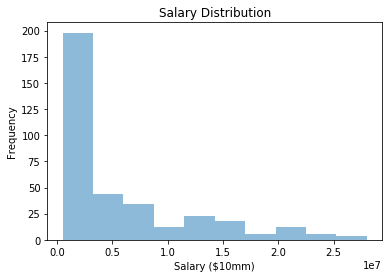

In [7]:
##wOBA
plt.hist(df['salary'], bins=10, alpha=0.5)
plt.xlabel('Salary ($10mm)')
plt.ylabel('Frequency')
plt.title('Salary Distribution')

In [8]:
#Test
df = df[['wOBA', 'salary']]
df.shape

(357, 2)

**Due to different scales of features, good to normalize/standardize the data**

In [9]:
#Normalize Data
min_max_scaler = preprocessing.MinMaxScaler().fit(df)

dfNorm= min_max_scaler.transform(df)

**How Does One Determine the Best Number of Clusters?**

In [10]:
#Function
def cluster_sizes(clusters):
    #clusters is an array of cluster labels for each instance in the data
    
    size = {}
    cluster_labels = np.unique(clusters)
    n_clusters = cluster_labels.shape[0]

    for c in cluster_labels:
        size[c] = len(df[clusters == c])
    return size

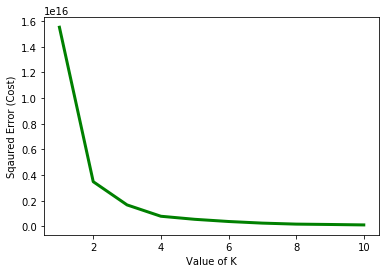

In [11]:
cost =[] 
for i in range(1, 11): 
    KM = KMeans(n_clusters = i, max_iter = 500) 
    KM.fit(df) 
      
    # calculates squared error 
    # for the clustered points 
    cost.append(KM.inertia_)      
  
# plot the cost against K values 
plt.plot(range(1, 11), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.show() # clear the plot 
  
# the point of the elbow is the  
# most optimal value for choosing k

**3 clusters is the best...so we will roll with 3.**

In [12]:
kmeans = KMeans(n_clusters=3, max_iter=500)
kmeans.fit(dfNorm)
clusters = kmeans.predict(dfNorm)

size = cluster_sizes(clusters)

for c in size.keys():
    print("Size of Cluster", c, "= ", size[c])
 

Size of Cluster 0 =  170
Size of Cluster 1 =  74
Size of Cluster 2 =  113


**Visualization of Clusters**

Text(0, 0.5, 'Salary')

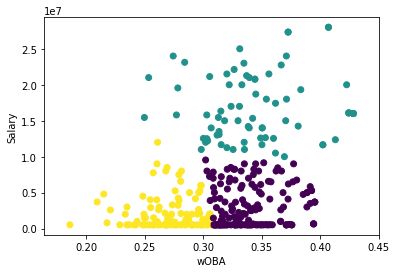

In [13]:
plt.scatter(df['wOBA'], df['salary'], c=clusters)
plt.xlabel("wOBA") 
plt.ylabel("Salary") 

In [14]:
df['cluster'] = clusters
df['name'] = names

In [15]:
df.isna().sum()

wOBA       0
salary     0
cluster    0
name       0
dtype: int64

In [16]:
df.shape

(357, 4)

In [17]:
cluster0 = df[df['cluster'] == 0]
cluster1 = df[df['cluster'] == 1]
cluster2 = df[df['cluster'] == 2]

c_mean0 = cluster0['salary'].mean()
c_mean1 = cluster1['salary'].mean()
c_mean2 = cluster2['salary'].mean()

print('Cluster 0 mean salary: ', c_mean0)
print('Cluster 1 mean salary: ', c_mean1)
print('Cluster 2 mean salary: ', c_mean2)

Cluster 0 mean salary:  2913665.994117647
Cluster 1 mean salary:  16849278.37837838
Cluster 2 mean salary:  2033134.6017699116


**Clusters 0 and 2 have similar mean salaries. Cluster 1 is quite a bit higher**

In [18]:
w_mean0 = cluster0['wOBA'].mean()
w_mean1 = cluster1['wOBA'].mean()
w_mean2 = cluster2['wOBA'].mean()

print('Cluster 0 mean wOBA: ', cluster0['wOBA'].mean())
print('Cluster 1 mean wOBA: ', cluster1['wOBA'].mean())
print('Cluster 2 mean wOBA: ', cluster2['wOBA'].mean())

Cluster 0 mean wOBA:  0.3399042186764707
Cluster 1 mean wOBA:  0.3457513966621622
Cluster 2 mean wOBA:  0.27294363568141583


<br>
<br>

**Analysis**

Okay, so we now know that we know Cluster 1 is where we want to evaluate, let's dig in. 

First thing, I want to pull the players from Cluster 1 whose salaries are below the cluster's average. Then, I want to sort by players whose wOBA is the highest above the group's average. 

This will tell us the top players whose performance is above their cluster's average and are paid less than the group's mean - which suggests they are underpaid baed on their wOBA performance. 

In [19]:
bargain = cluster1[cluster1.salary <= c_mean1]

bargain['Salary Difference'] = (abs(bargain['salary'] - c_mean1))
bargain['wOBA Difference'] = (abs(bargain['wOBA'] - c_mean1))

s = bargain.sort_values('wOBA Difference')

In [20]:
s.head(10)

,wOBA,salary,cluster,name,Salary Difference,wOBA Difference
20,0.428221,16000000,1,shawtr01,8.492784e+05,1.684928e+07
21,0.428221,16000000,1,vazquch01,8.492784e+05,1.684928e+07
22,0.428221,16000000,1,youngch04,8.492784e+05,1.684928e+07
23,0.428221,16000000,1,abreujo02,8.492784e+05,1.684928e+07
52,0.424347,16083333,1,hicksaa01,7.659454e+05,1.684928e+07
51,0.424347,16083333,1,headlch01,7.659454e+05,1.684928e+07
53,0.424347,16083333,1,mccanbr01,7.659454e+05,1.684928e+07
240,0.412911,12359375,1,myerswi01,4.489903e+06,1.684928e+07
328,0.402240,11650000,1,grandcu01,5.199278e+06,1.684928e+07
329,0.402240,11650000,1,lagarju01,5.199278e+06,1.684928e+07


**Top 10 Underpaid Players Based on wOBA**

1. Travis Shaw
2. Christian Vazquez
3. Chris Young
4. Jose Abreu
5. Aaron Hicks
6. Chase Headley
7. Brian McCann
8. Will Meyers
9. Curtis Granderson
10. Juan Lagares

<br>
<br>

**Now, let's say I'm a team and want to identify where I can aquire a player with high wOBA and a lower salary. Looking at the scatter plot, we see that there are several players with high wOBA and low salaries...so let's find them.**

In [29]:
bargain2 = cluster0[cluster0.wOBA >= w_mean0]
bargain2 = bargain2[bargain2.salary <=10000000]

s = bargain2.sort_values('wOBA')
s.head(10)

,wOBA,salary,cluster,name
270,0.340009,512000,0,dietrde01
291,0.340512,2500000,0,millebr02
193,0.340595,528000,0,gutiefr01
32,0.340933,2750000,0,rolliji01
207,0.341241,2500000,0,rasmuco01
271,0.341507,525500,0,gordode01
86,0.341650,6166667,0,garcigr01
164,0.341816,524500,0,orlanpa01
14,0.342561,650000,0,hanigry01
142,0.342805,7500000,0,ruary01


**Top Ten Players with wOBA and Lower Salary**
1. Derek Dietrich
2. Brad Miller
3. Franklin Gutierrez
4. Jimmy Rollins
5. Colby Rasmus
6. Dee Gordon
7. Greg Garcia
8. Paulo Orlando
9. Ryan Hanigan
10. Ryan Rua